## Given loan data from lending club for the year 2007-2010, determine if a loan was paid in full or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans=pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory data analysis

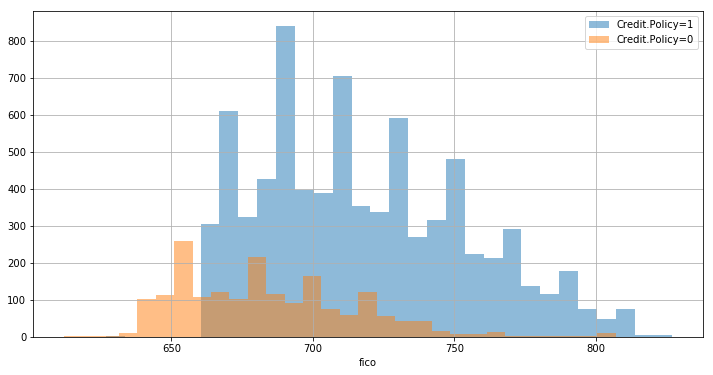

In [16]:
plt.figure(figsize=(12,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=30, label='Credit.Policy=1',alpha=0.5)
loans[loans['credit.policy']==0]['fico'].hist(bins=30,label='Credit.Policy=0',alpha=0.5)

plt.legend()
plt.xlabel('fico')

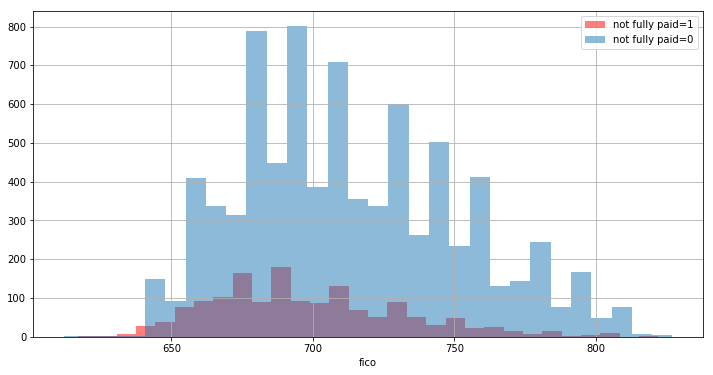

In [18]:
plt.figure(figsize=(12,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30, label='not fully paid=1',alpha=0.5,color='red')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30,label='not fully paid=0',alpha=0.5)

plt.legend()
plt.xlabel('fico')

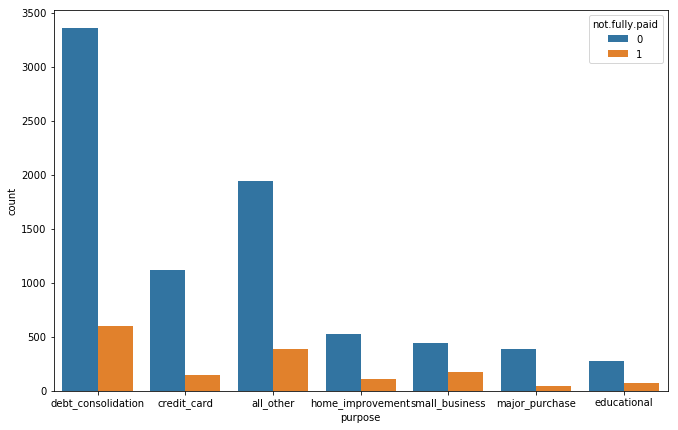

In [20]:
plt.figure(figsize=(11,7))
sns.countplot(x=loans['purpose'],hue=loans['not.fully.paid'])

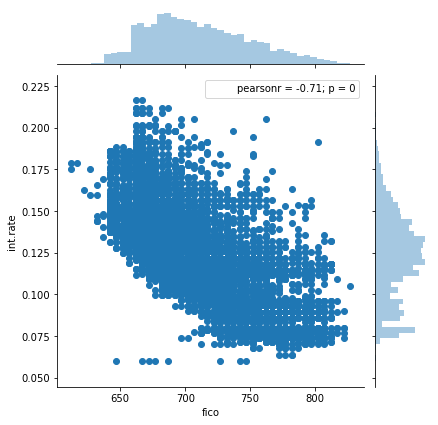

In [21]:
sns.jointplot(x=loans['fico'],y=loans['int.rate'])

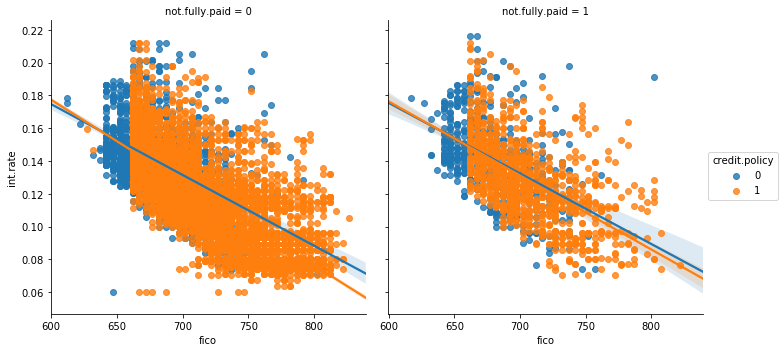

In [26]:
sns.lmplot(y='int.rate',x='fico',data=loans,col='not.fully.paid',hue='credit.policy')

# setting up dummy variables for readability of categorical data


In [27]:
cat_feat=['purpose']

In [31]:
final_data=pd.get_dummies(data=loans,columns=cat_feat,drop_first=True)

In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

# train test split

In [33]:
from sklearn.cross_validation import train_test_split


In [40]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# import decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
tree=DecisionTreeClassifier()


In [43]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
predictions=tree.predict(X_test)

## Model evaluation

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.19      0.24      0.21       443

avg / total       0.75      0.73      0.74      2874



In [57]:
print (confusion_matrix(y_test,predictions))

[[1987  444]
 [ 338  105]]


## create a random forest model

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
R_forest=RandomForestClassifier()

In [81]:
R_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
predictions1=R_forest.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix,classification_report

In [84]:
print(classification_report(y_test,predictions1))

             precision    recall  f1-score   support

          0       0.85      0.99      0.91      2431
          1       0.31      0.03      0.05       443

avg / total       0.77      0.84      0.78      2874



In [64]:
print(confusion_matrix(y_test,predictions1))

[[2401   30]
 [ 418   25]]


## increasing no. of estimators

In [101]:
from sklearn.ensemble import RandomForestClassifier
R_forest=RandomForestClassifier(n_estimators=600)
R_forest.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
predictions2=R_forest.predict(X_test)

In [103]:
from sklearn.metrics import confusion_matrix,classification_report

In [104]:
print(classification_report(y_test,predictions2))
print('\n')
print(confusion_matrix(y_test,predictions2))


             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.60      0.02      0.04       443

avg / total       0.81      0.85      0.78      2874



[[2425    6]
 [ 434    9]]


# conclusion
Random forest model seem to perform marginally better than decision trees. However the recall value for the class 1 is very poor in the random forest model. This could be possibly due to the lower number of instances available in the test set. Indicates the need to perform more feature engineering.

Based on the parameters we require we may choose the approproate model.